# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [65]:
#!pip install citipy

In [66]:
#cities

### Generate the Cities List by Using the `citipy` Library

In [67]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [68]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url+"&q="+city
    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" %
          (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

     # Run an API request for each of the cities
    try:
         # Parse the JSON and retrieve data
         response = requests.get(city_url)
         if response.status_code == 200:
              response_json = response.json()
         else:
            print(f"Error: Status code {response.status_code}")
         city_weather = response_json

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
         city_lat = city_weather["coord"]["lat"]
         city_lng = city_weather["coord"]["lon"]
         city_max_temp = city_weather["main"]["temp_max"]
         city_humidity = city_weather["main"]["humidity"]
         city_clouds = city_weather["clouds"]["all"]
         city_wind = city_weather["wind"]["speed"]
         city_country = city_weather["sys"]["country"]
         city_date = city_weather["dt"]

         # Append the City information into city_data list
         city_data.append({"City": city,
                           "Lat": city_lat,
                           "Lng": city_lng,
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
 # Indicate that Data Loading is complete 
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | taiohae
Error: Status code 404
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | puerto natales
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | arkhangel'sk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | bel ombre
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | invercargill
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | stanley
-----------------------------
Data Retrieval Complete      
---------------

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [70]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,23.44,81,20,3.60,US,1696249192
1,taiohae,22.0669,-159.3780,23.44,81,20,3.60,US,1696249192
2,puerto natales,-51.7236,-72.4875,3.25,75,100,3.09,CL,1696248975
3,arkhangel'sk,64.5401,40.5433,9.51,95,75,3.84,RU,1696249193
4,bel ombre,-4.6167,55.4167,28.91,74,40,6.17,SC,1696249193


In [71]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [72]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,23.44,81,20,3.60,US,1696249192
1,taiohae,22.0669,-159.3780,23.44,81,20,3.60,US,1696249192
2,puerto natales,-51.7236,-72.4875,3.25,75,100,3.09,CL,1696248975
3,arkhangel'sk,64.5401,40.5433,9.51,95,75,3.84,RU,1696249193
4,bel ombre,-4.6167,55.4167,28.91,74,40,6.17,SC,1696249193


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

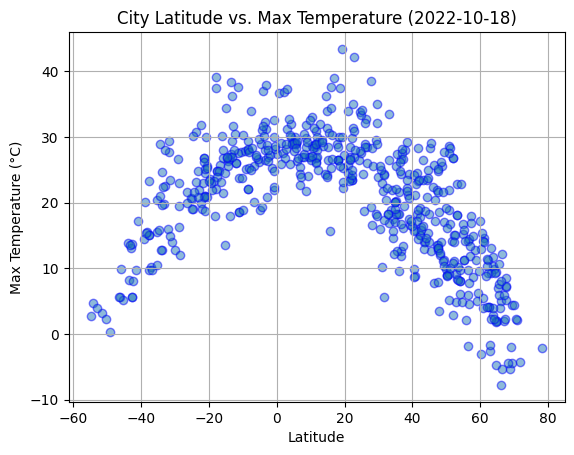

In [73]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="blue", alpha=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

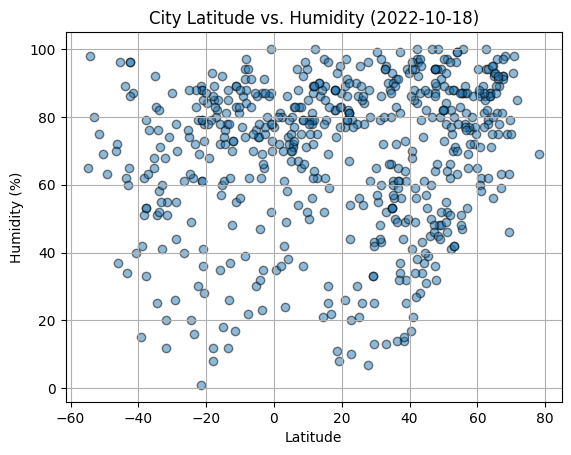

In [74]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

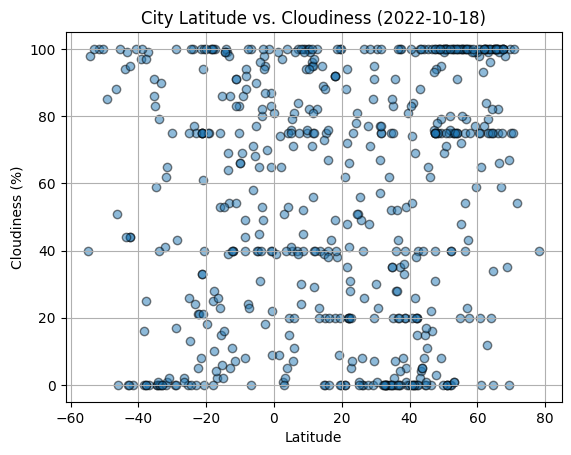

In [75]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

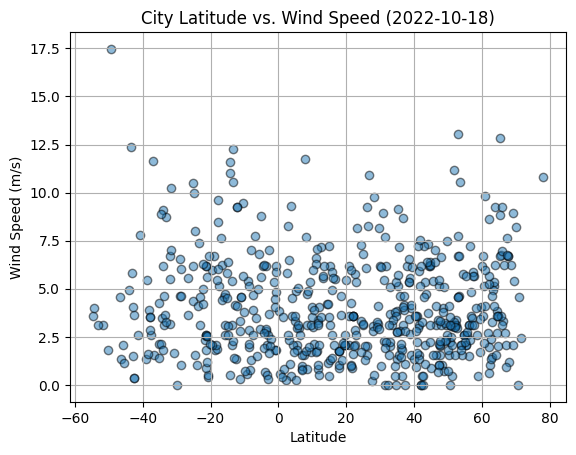

In [76]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.5)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x, y, xlabel, ylabel, title, output_filename):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    print(regress_values)



In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,23.44,81,20,3.60,US,1696249192
1,taiohae,22.0669,-159.3780,23.44,81,20,3.60,US,1696249192
3,arkhangel'sk,64.5401,40.5433,9.51,95,75,3.84,RU,1696249193
6,stanley,54.8680,-1.6985,15.16,83,20,2.57,GB,1696249194
13,chernyshevskiy,63.0128,112.4714,-2.55,79,99,3.26,RU,1696249196


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,3.25,75,100,3.09,CL,1696248975
4,bel ombre,-4.6167,55.4167,28.91,74,40,6.17,SC,1696249193
5,invercargill,-46.4000,168.3500,5.57,72,51,1.34,NZ,1696249194
7,touros,-5.1989,-35.4608,26.14,76,77,8.77,BR,1696249194
8,launceston,-41.4500,147.1667,9.80,87,0,2.57,AU,1696249064


###  Temperature vs. Latitude Linear Regression Plot

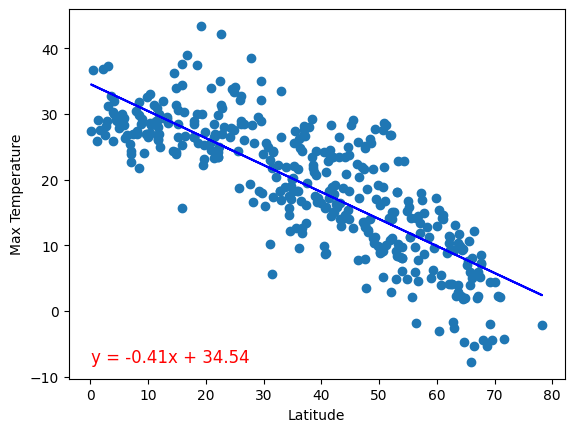

r value: -0.8122864231477838


In [80]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.savefig('output_data/northern_hemi_temp_vs_lat_regression.png')
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
print(f'r value: {r_value}')





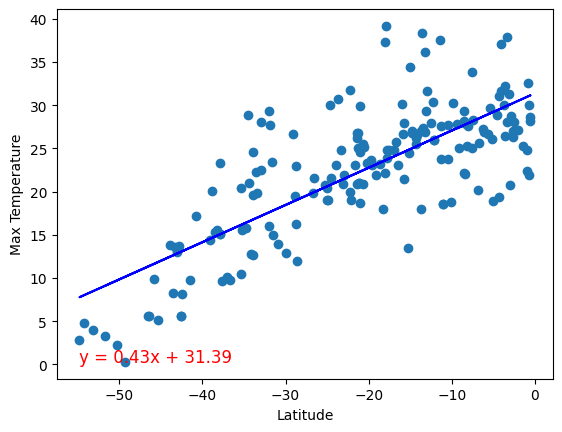

r value: 0.7601722071234286


In [81]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.savefig('output_data/southern_hemi_temp_vs_lat_regression.png')
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
print(f'r value: {r_value}')


**Discussion about the linear relationship:** tempature rises as it gets closer to latitudes of 0, then starts to fall when the latitude increases.

### Humidity vs. Latitude Linear Regression Plot

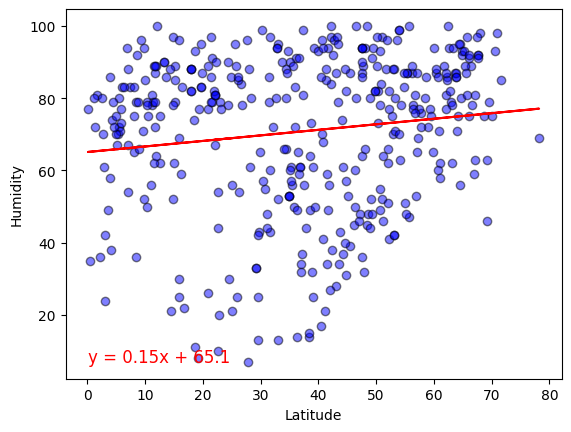

r value: 0.13790158772818287


In [82]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
print(f'r value: {r_value}')


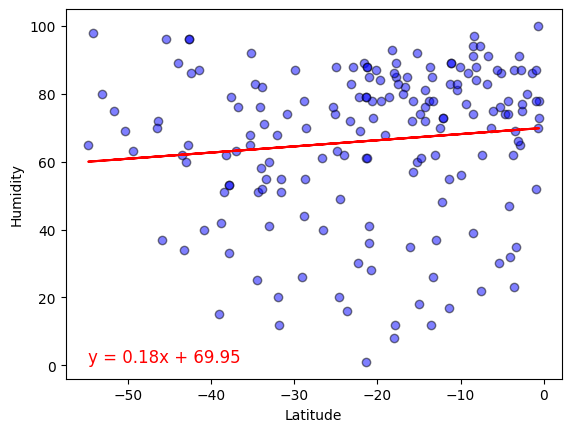

r value: 0.11169907458858971


In [83]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
print(f'r value: {r_value}')

**Discussion about the linear relationship:** the humidity on average is the same regardless of location, but in the nothern hemisphere tends to be clumped together in the same location compared to the southern hemisphere, which is more spread out.

### Cloudiness vs. Latitude Linear Regression Plot

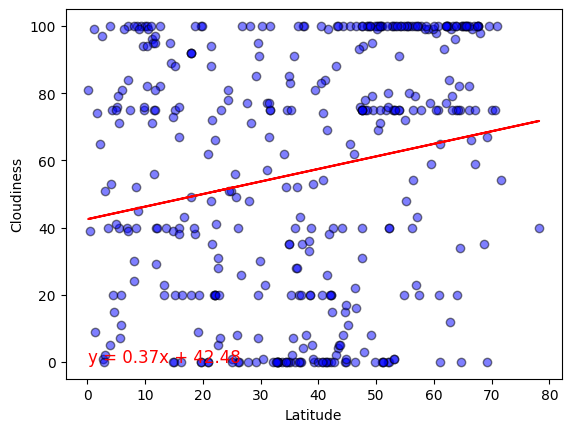

r value: 0.19622530659730614


In [84]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
print(f'r value: {r_value}')

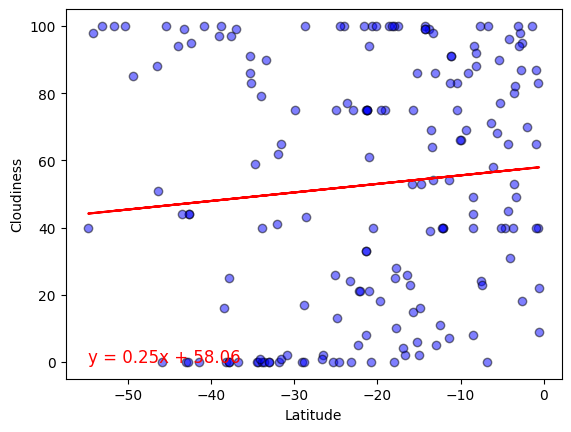

r value: 0.09560257952472703


In [85]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
print(f'r value: {r_value}')



**Discussion about the linear relationship:** the nothern hemisphere is way more cloudier then the southern hemisphere. the r values here also show weak positive correlations and the regression lines both show increases in cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

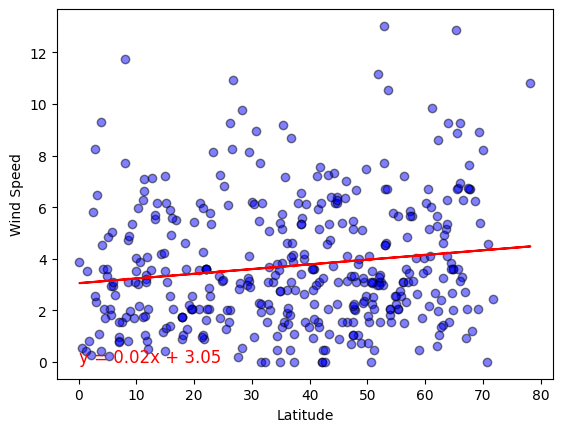

r value: 0.1458452894454249


In [86]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
print(f'r value: {r_value}')

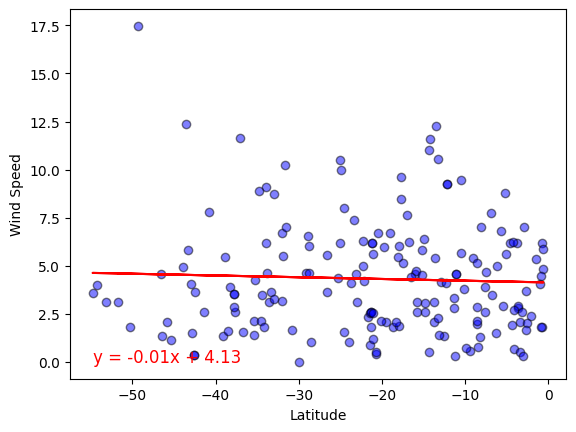

r value: -0.04311350036485281


In [87]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, color='blue', alpha=0.5, edgecolors="black")
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.show()
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
print(f'r value: {r_value}')

**Discussion about the linear relationship:** the wind speeds tend to be pretty low in both hemispheres but they both have outliers. wind speed decreases the closer to a latidue of 0 and then starts to increase.